In [1]:
from config import Configuration
from utils import *
from model import *
import pickle
import time
import scipy
from experiment import DR_Markowitz_Experiment
%matplotlib inline

In [2]:
# Show the default configuration
Configuration.__dict__

mappingproxy({'__module__': 'config',
              '__doc__': '\n    Class that saves the value of Default Parameters\n    ',
              'learning_rate': 0.05,
              'max_iter': 500,
              'tol': 1e-08,
              'model_name': 'Default Model',
              'fit_intercept': False,
              'regularization': 0.1,
              'delta': 0.1,
              'gamma': 0,
              'A': 1,
              '__dict__': <attribute '__dict__' of 'Configuration' objects>,
              '__weakref__': <attribute '__weakref__' of 'Configuration' objects>})

# Experiment with Simulated Data

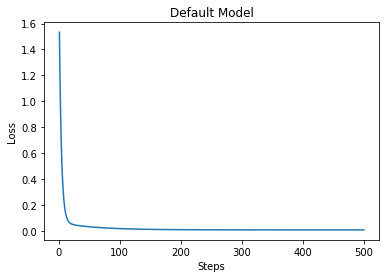

[0.71856141 1.01767069 0.74117848 0.0616937  0.0911751 ]


In [3]:
"""
Experiement for Linear Regression Gradient Descent Model
"""
true_var = np.random.rand(5)
X, y = LinearRegressionDataGenerator(true_var).generate(50)
my_LR_model = LinearRegressionGradientDescent(X=X, y=y)
my_LR_model.optimize(verbose = False)
#Check the accuracy of the solution
#my_LR_model.var - np.linalg.lstsq(X,y,rcond=None)[0]
my_LR_model.plot_loss_path()
print(my_LR_model.var)

Elapsed time = 0.09546923637390137


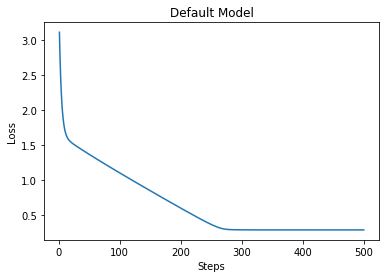

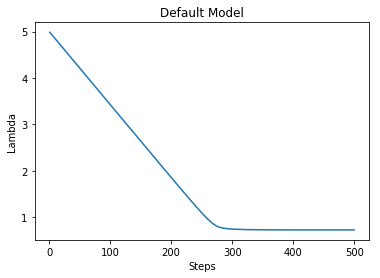

[0.66441725 0.90487693 0.68553158 0.15280918 0.18440721 0.72273913]


In [4]:
"""
Experiement for Linear Regression DRO
"""
DR_linear_model = DistRobustLinearRegression(X=X, y=y)
start = time.time()
DR_linear_model.optimize(verbose = False, grad_method = 'analytic')
end = time.time()
print("Elapsed time = %s" % (end - start))
DR_linear_model.plot_loss_path()
DR_linear_model.plot_lambda_path()
print(DR_linear_model.var)

In [ ]:
"""
Experiment for DR-Markowitz model
"""
DR_Markowitz_Model = DistRobustMarkowitz(X = np.random.randn(50, 5))
print(DR_Markowitz_Model.gradient(method = 'numeric'))
print(DR_Markowitz_Model.gradient(method = 'analytic'))
start = time.time()
DR_Markowitz_Model.optimize(verbose = False, grad_method = 'analytic')
end = time.time()
print("Elapsed time = %s" % (end - start))
DR_Markowitz_Model.plot_loss_path()
DR_Markowitz_Model.plot_lambda_path()
print(DR_Markowitz_Model.var)

# Real Data Experiment

In [ ]:
experiment = DR_Markowitz_Experiment("../")
reg = 0.1
delta_list = [10]
method_list = ['covariance']
for delta in delta_list:
    for method in method_list:
        Configuration.delta = delta
        Configuration.regularization = reg
        returns_mat = experiment.portfolio_return(method = method)
        filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
        pickle.dump(returns_mat, open(filename, "wb" ))
        temp = np.cumprod(1+returns_mat, axis=1)
        bins = np.linspace(0,8,40)
        a = plt.hist(temp[:,-1], bins, facecolor='c', alpha=0.3)
        np.mean(temp[:,-1])

In [ ]:
experiment = DR_Markowitz_Experiment("../")
delta = 0.1
reg = 0.1
method = 'covariance'
Configuration.delta = delta
Configuration.regularization = reg
returns_mat = experiment.portfolio_return(method = method)
filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
pickle.dump(returns_mat, open(filename, "wb" ))
temp = np.cumprod(1+returns_mat, axis=1)
bins = np.linspace(0,8,40)
a = plt.hist(temp[:,-1], bins, facecolor='c', alpha=0.3)
np.mean(temp[:,-1])

In [ ]:
experiment = DR_Markowitz_Experiment("../")
reg = 0.1
method = 'covariance'
Configuration.delta = delta
Configuration.regularization = reg
returns_mat = experiment.portfolio_return(method = method)
filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
pickle.dump(returns_mat, open(filename, "wb" ))
temp = np.cumprod(1+returns_mat, axis=1)
bins = np.linspace(0,8,40)
a = plt.hist(temp[:,-1], bins, facecolor='c', alpha=0.3)
np.mean(temp[:,-1])

In [ ]:
experiment = DR_Markowitz_Experiment("../")
delta = 0.5
reg = 0.1
method = 'constant'
Configuration.delta = delta
Configuration.regularization = reg
returns_mat = experiment.portfolio_return(method = method)
filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
pickle.dump(returns_mat, open(filename, "wb" ))
temp = np.cumprod(1+returns_mat, axis=1)
bins = np.linspace(0,8,40)
a = plt.hist(temp[:,-1], bins, facecolor='c', alpha=0.3)
np.mean(temp[:,-1])

In [ ]:
delta = 0.1
reg = 0.1
method = 'covariance'
filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
returns_mat = pickle.load(open(filename, "rb" ))
temp = np.cumprod(1+returns_mat, axis=1)
temp = (np.exp(np.log(temp[:,-1])/18) - 1)*100
bins = np.linspace(2,10,20)
a = plt.hist(temp, bins, facecolor='c', alpha=0.3)
np.mean(temp)

In [ ]:
reg = 0.1
delta_list = (0.01,0.1,0.2,0.3,0.4)
method_list = ('local', 'constant','covariance')
for delta in delta_list:
    for method in method_list:
        filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
        returns_mat = pickle.load(open(filename, "rb" ))
        temp = np.cumprod(1+returns_mat, axis=1)
        mean = np.mean(returns_mat)*12
        std = np.std(returns_mat)*np.sqrt(12)
        print('{}'.format(filename))
        print('annual expected return: {}'.format(mean))
        print('annual std: {}'.format(std))
        print('sharp ratio: {}'.format(mean/std))

In [ ]:
experiment = DR_Markowitz_Experiment("../")
delta = 0.1
reg = 0.1
Configuration.delta = delta
Configuration.regularization = reg
seed, month, method = 1,1,'covariance'
returns_train, returns_test = experiment.load_returns(seed, month)
A = experiment.get_mahalanobis_matrix(seed, month, method = method)
model = DistRobustMarkowitz(X = returns_train, A = A)
model.optimize(verbose = True, grad_method = 'analytic')
model.plot_loss_path()
model.plot_lambda_path()
one_step_return = returns_test.dot(model.beta)

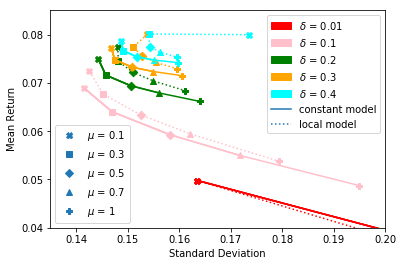

In [19]:
delta_list = (0.01,0.1,0.2,0.3,0.4)
color_list = ('red', 'pink','green','orange','cyan')
reg_list = [0.1,0.3,0.5,0.7,1]
marker_list = ['X','s','D','^','P']
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [Line2D([0], [0], marker= mk, label='$\mu$ = {}'.format(reg),
                  markersize=6, linewidth = 0) for mk,reg in zip(marker_list,reg_list)]
legend_elements_2 = [Patch(color = c, label='$\delta$ = {}'.format(d)) for c,d in zip(color_list,delta_list)]
legend_elements_2 += [Line2D([0], [0], ls = '-', label='constant model'), 
                     Line2D([0], [0], ls = ':', label='local model')]

fig = plt.figure()
ax = fig.add_subplot(111)

for delta, color in zip(delta_list,color_list):
    mean_list = []
    std_list = []
    
    method = 'constant'
    for idx, reg in enumerate(reg_list):
        filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
        returns_mat = pickle.load(open(filename, "rb" ))
        temp = np.cumprod(1+returns_mat, axis=1)
        mean = np.mean(returns_mat)*12
        std = np.std(returns_mat)*np.sqrt(12)
        mean_list.append(mean)
        std_list.append(std)
        ax.plot(std_list, mean_list,'-', c=color)
    
    for idx, reg in enumerate(reg_list):
        ax.scatter(std_list[idx], mean_list[idx], c=color, marker = marker_list[idx], linewidths = 1)
    
    method = 'local'
    mean_list = []
    std_list = []
    for reg in reg_list:
        filename = "delta_{}_reg_{}_method_{}".format(delta, reg, method)
        returns_mat = pickle.load(open(filename, "rb" ))
        temp = np.cumprod(1+returns_mat, axis=1)
        mean = np.mean(returns_mat)*12
        std = np.std(returns_mat)*np.sqrt(12)
        mean_list.append(mean)
        std_list.append(std)
    ax.plot(std_list, mean_list,':', c=color)
    
    for idx, reg in enumerate(reg_list):
        ax.scatter(std_list[idx], mean_list[idx], c=color, marker = marker_list[idx], linewidths = 1)
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return')
plt.ylim(0.04,0.085)
plt.xlim(0.135,0.2)
leg1 = ax.legend(handles=legend_elements_2, loc='upper right')
ax.legend(handles=legend_elements, loc='lower left')
ax.add_artist(leg1)
plt.savefig('out_of_sample_frontier.pdf', format = 'pdf')

# Experiment using simulated data

In [27]:
delta_list = (0.01,0.1,0.2,0.3,0.4)
reg_list = [0]
for delta in delta_list:
    for reg in reg_list:
        Configuration.delta = delta
        Configuration.regularization = reg
        method = 'constant'
        print('delta = {a}, reg = {b}'.format(a = delta, b = reg))
        experiment = DR_Markowitz_Experiment("../")
        returns_train, returns_test = experiment.load_returns(2,1)
        exp_mean = np.mean(returns_train,axis = 0)
        exp_cov = np.cov(returns_train.T)
        return_list = experiment.simulated_portfolio_return(exp_mean, exp_cov)
        filename = "./Simulated_Result/simulated_delta_{}_reg_{}_method_{}".format(delta, reg, method)
        pickle.dump(return_list, open(filename, "wb" ))

delta = 0.01, reg = 0


delta = 0.1, reg = 0


delta = 0.2, reg = 0


delta = 0.3, reg = 0


delta = 0.4, reg = 0


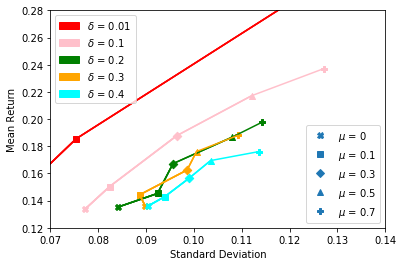

In [18]:
delta_list = (0.01,0.1,0.2,0.3,0.4)
color_list = ('red', 'pink','green','orange','cyan')
reg_list = [0,0.1,0.3,0.5,0.7]
marker_list = ['X','s','D','^','P']
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [Line2D([0], [0], marker= mk, label='$\mu$ = {}'.format(reg),
                  markersize=6, linewidth = 0) for mk,reg in zip(marker_list,reg_list)]
legend_elements_2 = [Patch(color = c, label='$\delta$ = {}'.format(d)) for c,d in zip(color_list,delta_list)]

fig = plt.figure()
ax = fig.add_subplot(111)

for delta, color in zip(delta_list,color_list):
    mean_list = []
    std_list = []
    
    method = 'constant'
    for idx, reg in enumerate(reg_list):
        filename = "./Simulated_Result/simulated_delta_{}_reg_{}_method_{}".format(delta, reg, method)
        returns_mat = pickle.load(open(filename, "rb" ))
        mean = np.mean(returns_mat)
        std = np.std(returns_mat)
        mean_list.append(mean)
        std_list.append(std)
        ax.plot(std_list, mean_list,'-', c=color)
    
    for idx, reg in enumerate(reg_list):
        ax.scatter(std_list[idx], mean_list[idx], c=color, marker = marker_list[idx], linewidths = 1)
    
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return')
plt.xlim(0.07,0.14)
plt.ylim(0.12,0.28)
leg1 = ax.legend(handles=legend_elements_2, loc='upper left')
ax.legend(handles=legend_elements, loc='lower right')
ax.add_artist(leg1)
plt.savefig('simulated_out_of_sample_frontier.pdf', format = 'pdf')

0.07808352377506741